# Code to Split CSV if Necessary

In [1]:
# From https://gist.github.com/jrivero/1085501
import os

def split(filehandler, delimiter=',', row_limit=10000, 
    output_name_template='output_%s.csv', output_path='.', keep_headers=True):
    """
    Splits a CSV file into multiple pieces.
    
    A quick bastardization of the Python CSV library.

    Arguments:

        `row_limit`: The number of rows you want in each output file. 10,000 by default.
        `output_name_template`: A %s-style template for the numbered output files.
        `output_path`: Where to stick the output files.
        `keep_headers`: Whether or not to print the headers in each output file.

    Example usage:
    
        >> from toolbox import csv_splitter;
        >> csv_splitter.split(open('/home/ben/input.csv', 'r'));
    
    """
    import csv
    reader = csv.reader(filehandler, delimiter=delimiter)
    current_piece = 1
    current_out_path = os.path.join(
         output_path,
         output_name_template  % current_piece
    )
    current_out_writer = csv.writer(open(current_out_path, 'w'), delimiter=delimiter)
    current_limit = row_limit
    if keep_headers:
#         headers = reader.next()
        headers = next(reader)
        current_out_writer.writerow(headers)
    for i, row in enumerate(reader):
        if i + 1 > current_limit:
            current_piece += 1
            current_limit = row_limit * current_piece
            current_out_path = os.path.join(
               output_path,
               output_name_template  % current_piece
            )
            current_out_writer = csv.writer(open(current_out_path, 'w'), delimiter=delimiter)
            if keep_headers:
                current_out_writer.writerow(headers)
        current_out_writer.writerow(row)

# Import CSV File after Converting to UTF-8 Format

In [1]:
import pandas as pd

BER_df = pd.read_csv('BERPublicsearch (UTF-8).csv')
BER_df.head(1000)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (61,62,63,64,65,66,71,73,97,98,139,144,150,155,161,166) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,CountyName,DwellingTypeDescr,Year_of_Construction,TypeofRating,EnergyRating,BerRating,GroundFloorArea(sq m),UValueWall,UValueRoof,UValueFloor,...,SecondWallIsSemiExposed,SecondWallAgeBandId,SecondWallTypeId,ThirdWallType_Description,ThirdWallDescription,ThirdWallArea,ThirdWallUValue,ThirdWallIsSemiExposed,ThirdWallAgeBandId,ThirdWallTypeId
0,Co. Clare,Detached house,2004,Existing,C2,191.77,213.98,0.55,0.35,0.41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Co. Waterford,Mid-terrace house,2006,Existing,C1,173.95,73.00,0.37,0.16,0.31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Co. Kildare,Semi-detached house,1987,Existing,C3,206.65,83.40,0.60,0.16,0.57,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Co. Dublin,Semi-detached house,1910,Existing,D2,292.51,269.28,2.10,1.27,0.62,...,No,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Co. Clare,House,1984,Existing,E2,362.62,120.81,0.31,0.13,0.57,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Waterford City,Maisonette,2006,Existing,D2,264.52,78.27,0.41,0.35,0.00,...,No,9.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,Dublin 16,Semi-detached house,1953,Existing,C1,156.17,160.00,0.34,0.17,0.45,...,No,10.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,Co. Tipperary,Semi-detached house,1994,Existing,C2,199.78,118.71,0.27,0.13,0.47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,Waterford City,Maisonette,2006,Existing,D1,230.67,78.27,0.55,0.35,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Get Some Basic Properties from the Data

,CountyName,DwellingTypeDescr,Year_of_Construction,TypeofRating,EnergyRating,BerRating,GroundFloorArea(sq m),UValueWall,UValueRoof,UValueFloor,...,SecondWallIsSemiExposed,SecondWallAgeBandId,SecondWallTypeId,ThirdWallType_Description,ThirdWallDescription,ThirdWallArea,ThirdWallUValue,ThirdWallIsSemiExposed,ThirdWallAgeBandId,ThirdWallTypeId
68932,Dublin 20,Top-floor apartment,1970,Existing,E1,331.72,89.91,1.78,0.40,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
133522,Dublin 6,Mid-floor apartment,2000,Existing,D1,234.68,87.76,0.68,0.00,0.60,...,No,9.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
400334,Dublin 6,Mid-floor apartment,1982,Existing,D1,237.97,50.00,1.10,0.00,0.00,...,No,6.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
332222,Co. Kerry,Top-floor apartment,1920,Existing,G,791.33,40.95,2.10,1.26,0.56,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
382561,Co. Dublin,Maisonette,2002,Existing,C2,176.42,69.39,0.53,0.36,0.29,...,Yes,9.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460740,Co. Donegal,Semi-detached house,1900,Existing,G,475.18,85.10,1.60,2.30,0.68,...,No,2.0,1.0,Stone,unheated space,13.10,1.377,Yes,2.0,1.0
577395,Co. Kildare,Semi-detached house,1994,Existing,D2,280.49,97.06,0.55,0.40,0.41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
662785,Dublin 18,Detached house,1970,Existing,C2,175.12,179.51,1.98,1.01,0.64,...,No,8.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
642932,Galway City,Detached house,2002,Existing,C2,175.58,166.37,0.31,0.23,0.43,...,No,10.0,5.0,Timber Frame,Walls adj attic,20.34,0.484,Yes,9.0,8.0


,Year_of_Construction,BerRating,GroundFloorArea(sq m),UValueWall,UValueRoof,UValueFloor,UValueWindow,UvalueDoor,WallArea,RoofArea,...,FirstWallAgeBandId,FirstWallTypeId,SecondWallArea,SecondWallUValue,SecondWallAgeBandId,SecondWallTypeId,ThirdWallArea,ThirdWallUValue,ThirdWallAgeBandId,ThirdWallTypeId
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,9806.000000,9980.000000,4832.000000,4832.000000,4736.000000,4825.000000,1836.000000,1836.000000,1778.000000,1831.000000
mean,1982.769600,243.751645,112.226126,0.681599,0.373946,0.440777,2.657104,2.439269,93.249822,68.788738,...,6.627575,5.740180,23.353453,0.770146,6.779983,6.657202,14.711919,0.772793,6.465692,6.300382
std,33.382516,156.687202,57.759426,0.564380,0.495358,0.248328,0.830627,1.010262,53.261298,48.819921,...,3.062729,2.773785,17.572354,0.613652,3.003298,3.426467,10.830968,0.607311,3.022557,3.001529
min,1760.000000,20.130000,10.670000,0.000000,0.000000,0.000000,0.660000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.239000,0.110000,0.000000,1.000000,0.200000,0.080000,0.000000,1.000000
25%,1972.000000,163.525000,77.200000,0.310000,0.130000,0.310000,2.200000,2.180000,54.500000,41.995000,...,5.000000,4.000000,11.622500,0.350000,5.000000,4.000000,6.720000,0.339000,4.000000,4.000000
50%,1996.000000,213.680000,98.640000,0.540000,0.220000,0.430000,2.700000,3.000000,86.235000,58.320000,...,7.000000,5.000000,19.105000,0.550000,8.000000,7.000000,12.350000,0.550000,7.000000,7.000000
75%,2005.000000,287.567500,131.977500,0.690000,0.400000,0.610000,3.040000,3.000000,113.785000,87.980000,...,9.000000,8.000000,30.462500,1.130000,9.000000,9.000000,20.145000,1.130000,9.000000,8.000000
max,2020.000000,4710.420000,814.000000,3.700000,2.300000,1.230000,5.700000,5.700000,597.600000,668.080000,...,11.000000,14.000000,220.280000,7.091000,11.000000,14.000000,77.780000,3.700000,11.000000,14.000000


Co. Cork          83526
Co. Dublin        71662
Co. Kildare       41268
Co. Galway        36729
Co. Meath         35918
Co. Wexford       30740
Co. Tipperary     29853
Co. Kerry         29732
Co. Donegal       28666
Co. Wicklow       27946
Co. Louth         26811
Co. Limerick      24896
Co. Mayo          24837
Co. Clare         23470
Cork City         22737
Dublin 15         22467
Co. Westmeath     16787
Dublin 24         16537
Limerick City     16126
Co. Kilkenny      15050
Co. Sligo         14554
Dublin 8          14285
Co. Laois         14258
Co. Waterford     14199
Galway City       14097
Co. Cavan         13800
Co. Carlow        12505
Co. Offaly        12318
Dublin 11         11686
Dublin 7          11610
Dublin 18         11139
Co. Roscommon     11074
Dublin 9          10914
Dublin 4          10751
Dublin 12         10384
Waterford City    10296
Dublin 14          9891
Dublin 16          9433
Co. Monaghan       8865
Dublin 6           8707
Dublin 5           8688
Dublin 3        

Num Region:  55


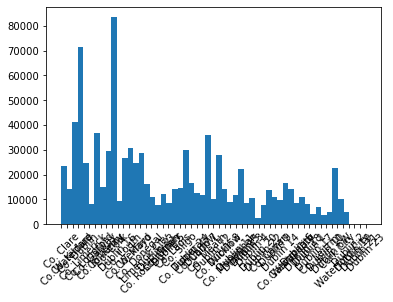

Num Rows BER_df:  937488


Co. Cork          863
Co. Dublin        746
Co. Kildare       467
Co. Galway        392
Co. Meath         348
Co. Wexford       339
Co. Tipperary     334
Co. Kerry         319
Co. Donegal       312
Co. Wicklow       290
Co. Louth         270
Co. Clare         269
Co. Limerick      254
Dublin 15         245
Co. Mayo          244
Cork City         217
Co. Westmeath     202
Dublin 24         194
Limerick City     179
Co. Kilkenny      169
Co. Cavan         158
Dublin 8          156
Galway City       151
Co. Waterford     150
Co. Carlow        143
Co. Sligo         142
Co. Offaly        142
Dublin 18         134
Dublin 4          133
Co. Roscommon     131
Dublin 7          129
Co. Laois         125
Dublin 12         121
Dublin 16         121
Dublin 11         119
Dublin 9          111
Waterford City    110
Dublin 3          109
Dublin 14          99
Dublin 6           89
Co. Leitrim        88
Dublin 5           87
Co. Monaghan       84
Dublin 13          82
Dublin 1           82
Co. Longfo

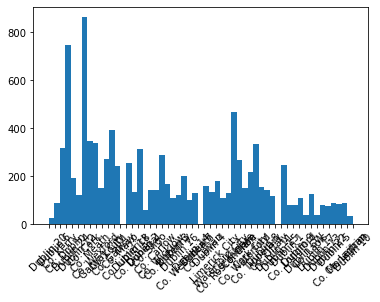

Num Rows BER_df_10k:  10000


In [14]:
import matplotlib.pyplot as plt

# Get random subset of 10000 records.
BER_df_10k = BER_df.sample(n=10000, random_state=42)

# Display a few rows.
display(BER_df_10k)

# Get summary data for numerical features.
display(BER_df_10k.describe())

# Number of records per region.
region_counts = BER_df['CountyName'].value_counts()
display(num_region)
num_regions = len(region_counts)
print('Num Region: ', num_regions)

# Get bar chart of counties for all data.
p = plt.hist(BER_df['CountyName'], bins=num_regions)
plt.xticks(rotation=45)
plt.show()

print('Num Rows BER_df: ', str(len(BER_df)))

# Show number of records per county for data subset.
display(BER_df_10k['CountyName'].value_counts())

# Get bar chart of counties for data subset.
p = plt.hist(BER_df_10k['CountyName'], bins=num_regions)
plt.xticks(rotation=45)
plt.show()

print('Num Rows BER_df_10k: ', str(len(BER_df_10k)))


In [ ]:
# Git command for creating alias for getting abbreviated commit log.

# alias log_1='git log --graph --decorate --all --pretty=oneline'